<a href="https://colab.research.google.com/github/estefaniis/Projects/blob/main/Organic_Products_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model One: Decision Tree

 -- train set --    

Accuracy : 0.7795
Precision: 0.5743
Recall.  : 0.6351

 -- test set --
Accuracy : 0.7967
Precision: 0.6046
Recall.  : 0.6546


In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data and check for missing values

In [ ]:
# load the data into a pandas dataframe

data_path = '/content/organics.csv'
df = pd.read_csv(data_path)



In [ ]:
# preview data
df.info()
df.head
print(df)

# total count of NaN values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
             ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender  \
0           140     10.0    76.0        16.0               C     

In [ ]:
df = df.dropna()

Dropped because most of the nulls lied in nominal data which can not be easily replaced by an aggregation


In [ ]:
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
#identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['ID', 'DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime',
       'TargetBuy', 'TargetAmt'],
      dtype='object')

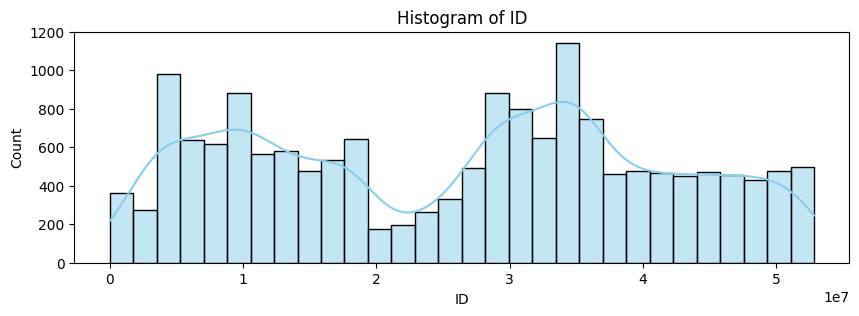

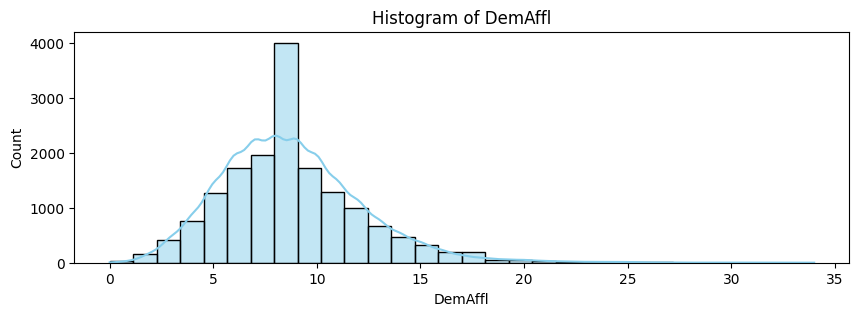

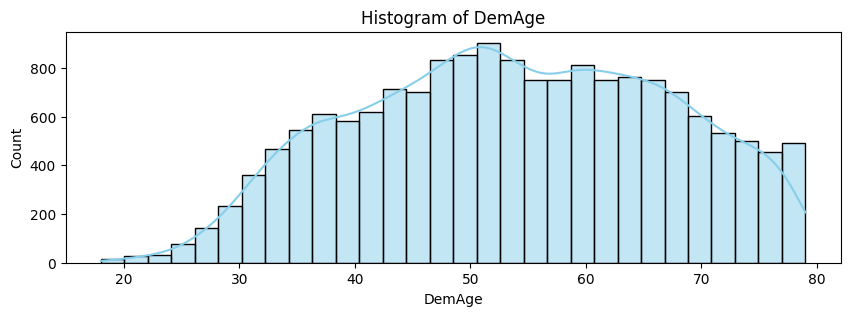

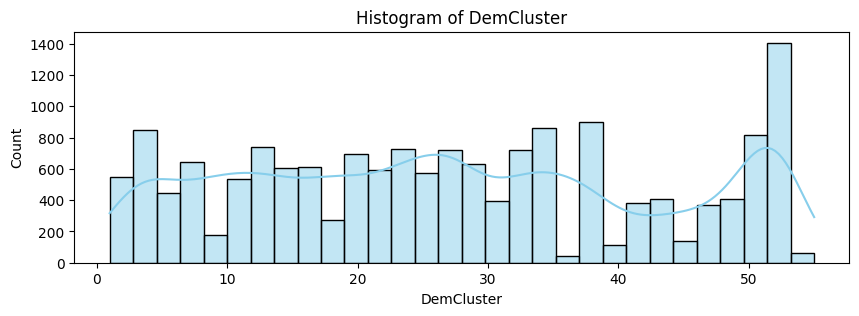

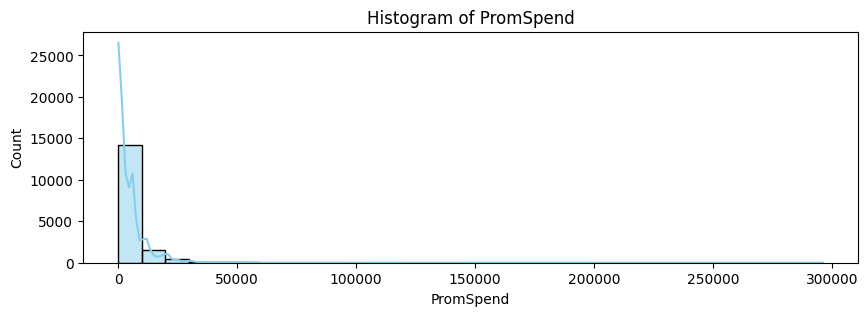

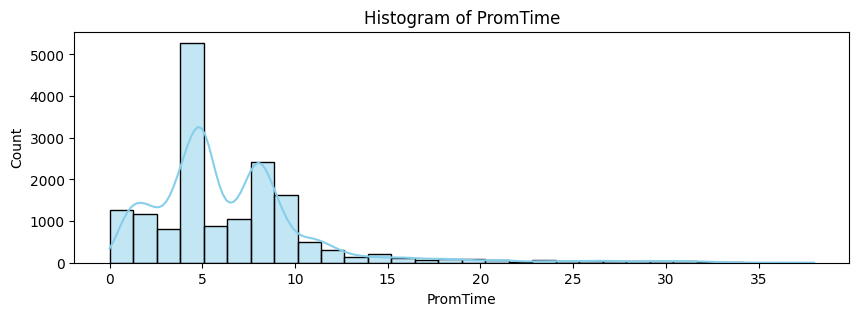

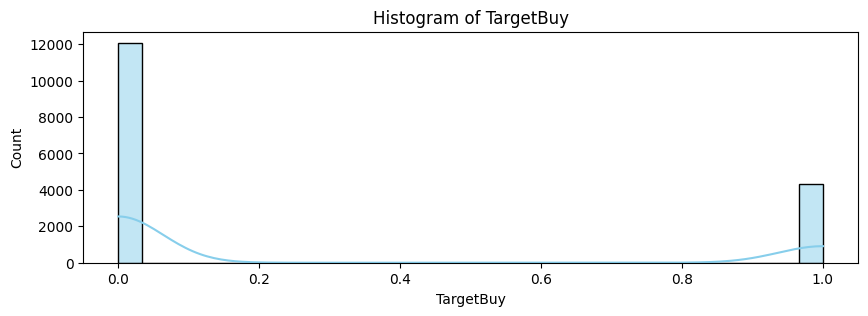

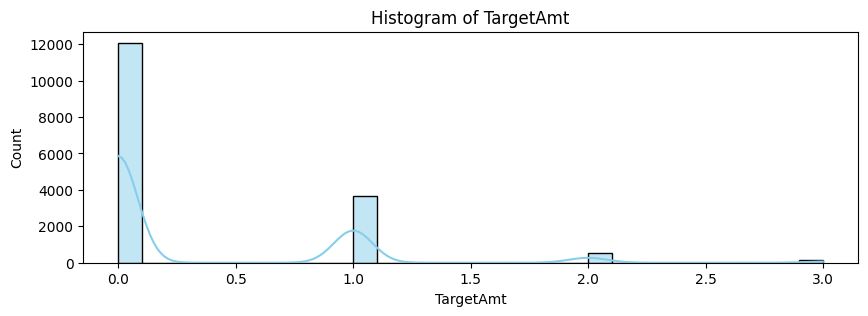

In [ ]:
numeric_feats = ['ID', 'DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime',
       'TargetBuy', 'TargetAmt']
#create for loop to produce graph for each numeric feat
for feature in numeric_feats:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(df,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

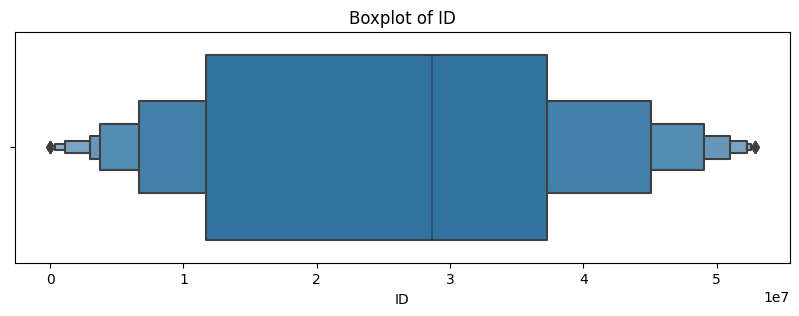

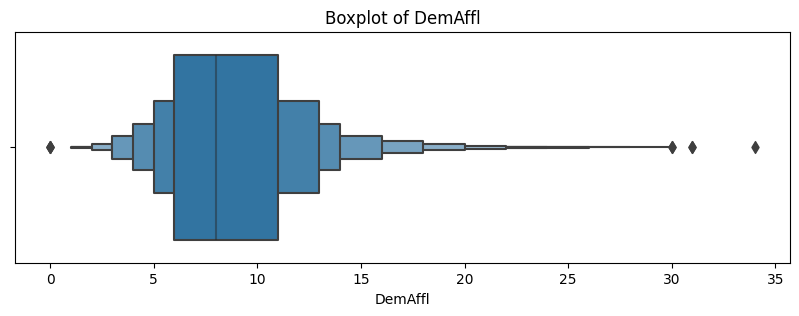

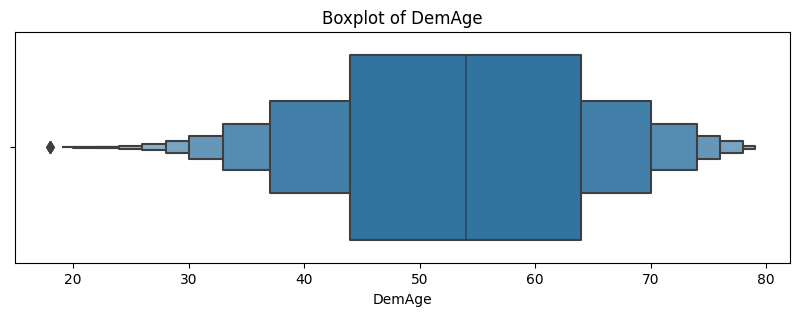

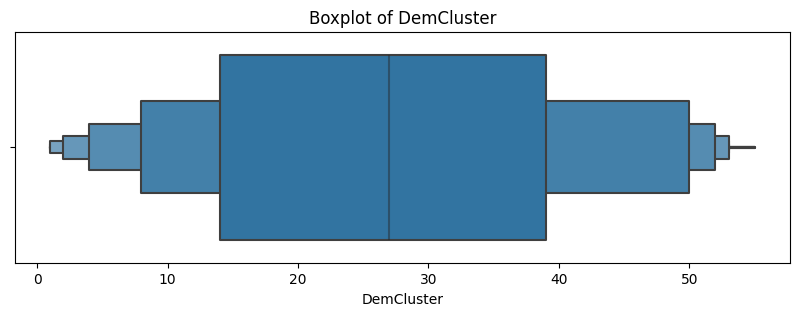

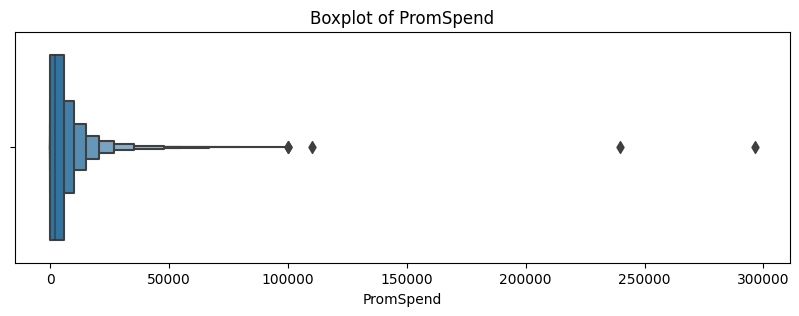

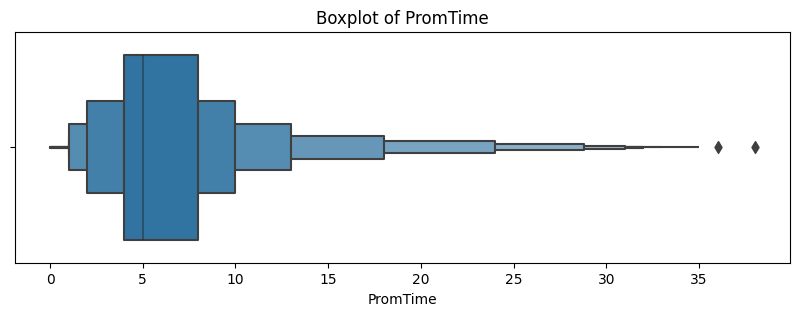

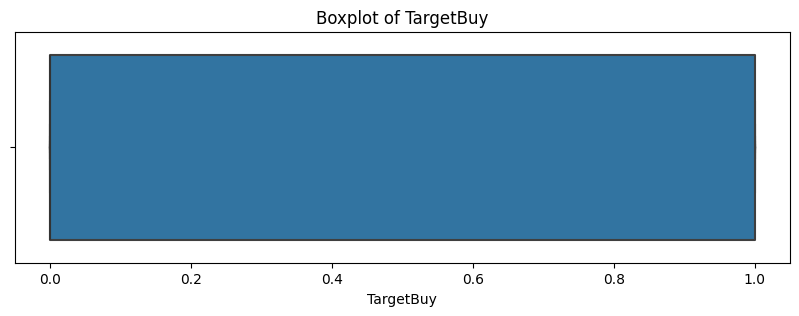

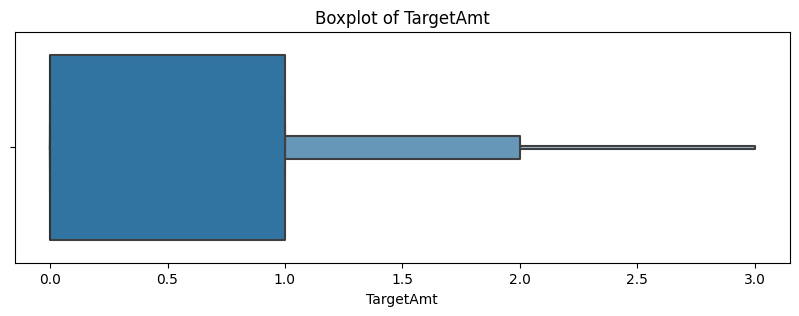

In [ ]:
for feature in numeric_feats:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(df,x=feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

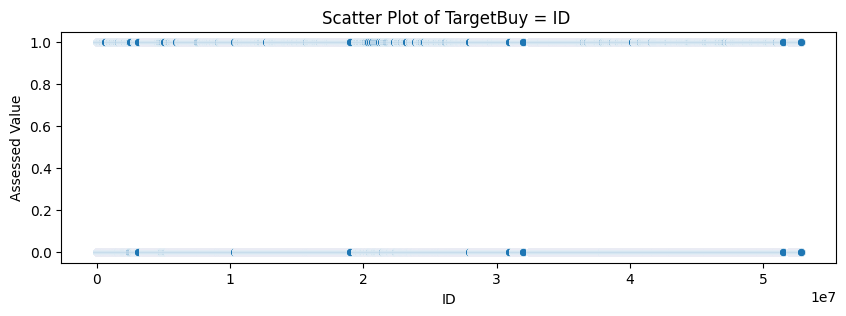

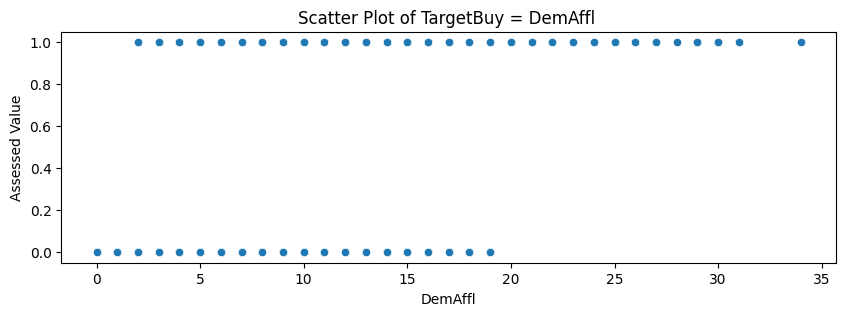

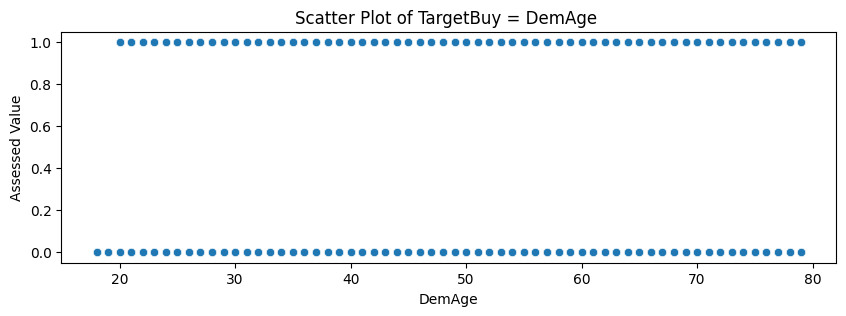

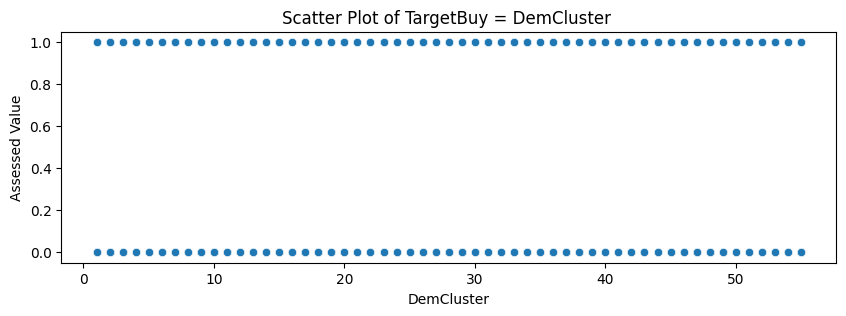

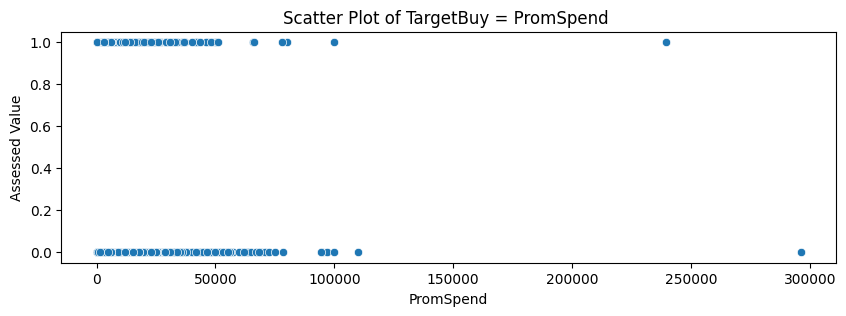

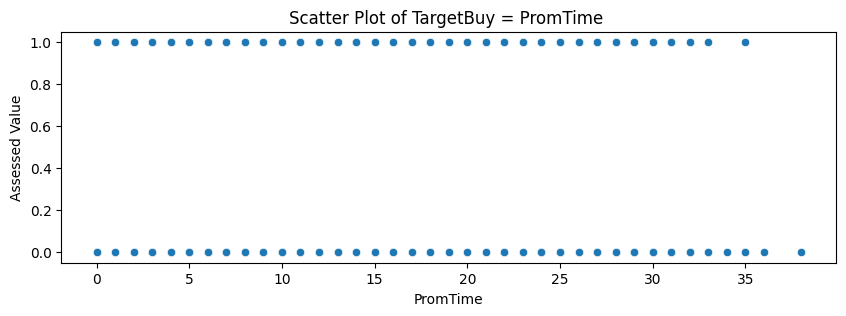

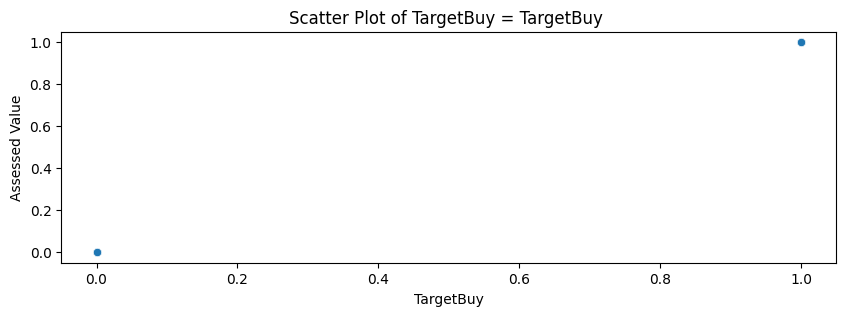

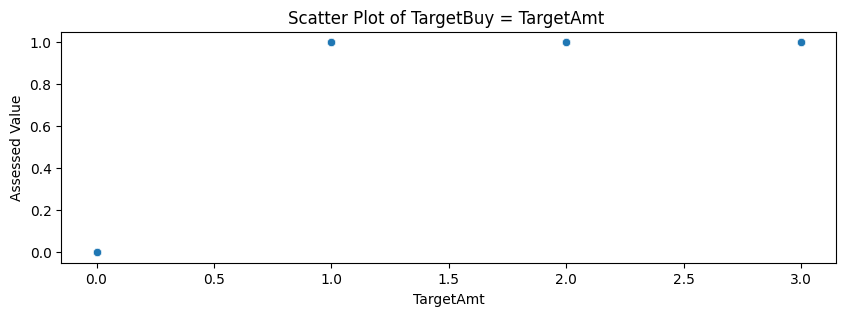

In [ ]:
#understand relationship between features and target var

for feature in numeric_feats:
  if feature != 'TagretBuy': # not include target var
    plt.figure(figsize=(10, 3))
    sns.scatterplot(df,x=feature, y='TargetBuy')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of TargetBuy = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    # Display the plot
    plt.show()

In [ ]:
#identify correlation
# Compute the correlation of each variable with the target
correlations = df[numeric_feats].apply(lambda x: x.corr(df['TargetBuy']))
df_correlations = correlations.to_frame(name='correlation')
#df_correlations.columns = ['feature', 'correlation']
df_correlations = df_correlations.sort_values('correlation', ascending=False)
df_correlations


,correlation
TargetBuy,1.000000
TargetAmt,0.911702
DemAffl,0.368374
DemCluster,0.066520
ID,0.007866
PromTime,-0.057431
PromSpend,-0.084762
DemAge,-0.307040


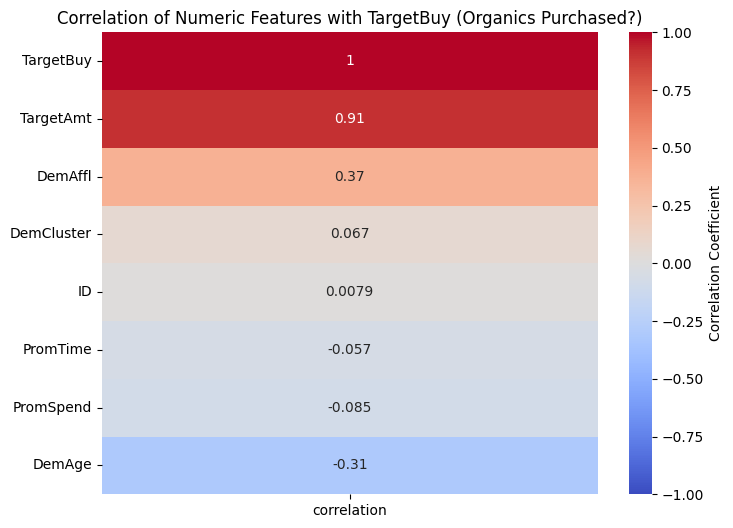

In [ ]:
#create heatmap correlation to see correlation better
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with TargetBuy (Organics Purchased?)')
plt.show()

Preprocess Data


*   Drop unnecessary variables
*   Convert target to numeric




In [ ]:
# drop unnecessary columns
df.drop(['ID', 'DemCluster','DemClusterGroup','DemTVReg'], axis=1, inplace=True)
# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()


,DemAffl,DemAge,DemGender,DemReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,U,Midlands,Gold,16000.00,4.0,0,0
1,4.0,49.0,U,Midlands,Gold,6000.00,5.0,0,0
2,5.0,70.0,F,Midlands,Silver,0.02,8.0,1,1
3,10.0,65.0,M,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,F,Midlands,Tin,0.01,8.0,0,0


Split data into training and test sets




In [ ]:
df.columns

Index(['DemAffl', 'DemAge', 'DemGender', 'DemReg', 'PromClass', 'PromSpend',
       'PromTime', 'TargetBuy', 'TargetAmt'],
      dtype='object')

In [ ]:
# split the data into training and testing sets
X = df.drop(['TargetBuy'], axis=1)
X = df[['DemAffl', 'DemAge', 'DemGender',
       'DemReg', 'PromClass', 'PromSpend', 'PromTime']]
X = pd.get_dummies(X, columns=['DemGender', 'DemReg', 'PromClass'], drop_first=False)


y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             11485 non-null  float64
 1   DemAge              11485 non-null  float64
 2   PromSpend           11485 non-null  float64
 3   PromTime            11485 non-null  float64
 4   DemGender_F         11485 non-null  uint8  
 5   DemGender_M         11485 non-null  uint8  
 6   DemGender_U         11485 non-null  uint8  
 7   DemReg_Midlands     11485 non-null  uint8  
 8   DemReg_North        11485 non-null  uint8  
 9   DemReg_Scottish     11485 non-null  uint8  
 10  DemReg_South East   11485 non-null  uint8  
 11  DemReg_South West   11485 non-null  uint8  
 12  PromClass_Gold      11485 non-null  uint8  
 13  PromClass_Platinum  11485 non-null  uint8  
 14  PromClass_Silver    11485 non-null  uint8  
 15  PromClass_Tin       11485 non-null  uint8  
dtype

 Decision Tree  
We will use 3 parameters to control the growth of the tree

- **max_depth** determines the maximum number of levels for the tree.  Smaller values help to prevent overfitting.  Default value = None

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **ccp_alpha** is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting.  Default value = 0.  Larger values yield a smaller tree.

In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 1, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

 Visualize Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

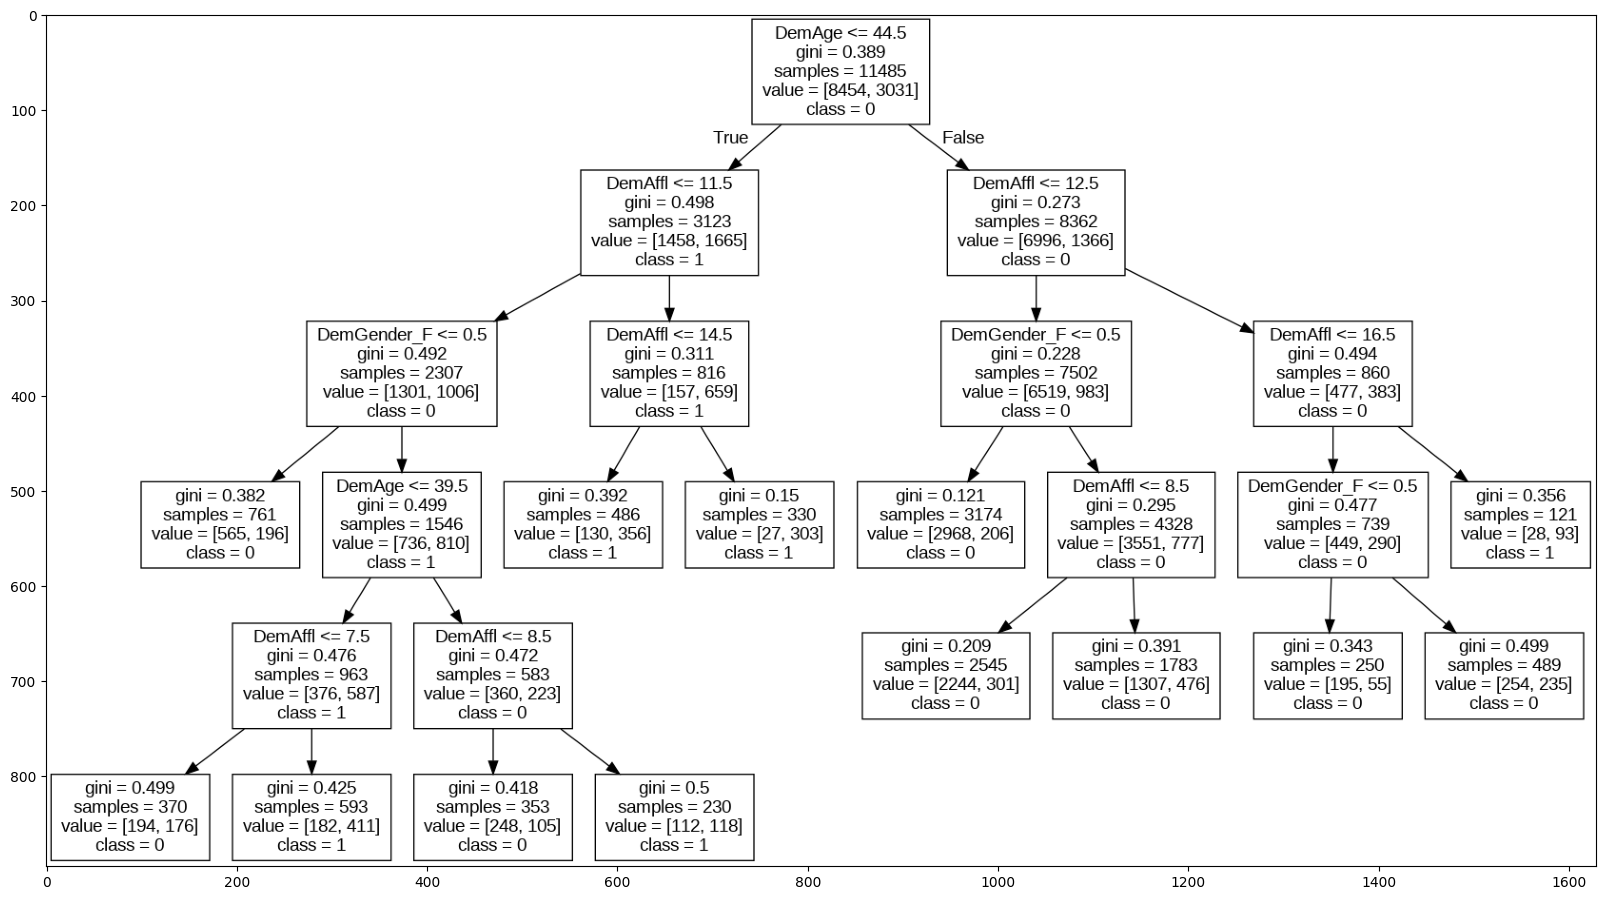

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

 Make Predictions on the training and test data

In [ ]:
y_prob_train = dt.predict_proba(X_train)[:, 1]
threshold = 0.3 # Change this threshold as needed
y_pred_train = (y_prob_train > threshold).astype('float')  # Convert probabilities to classes based on the threshold

y_prob_test = dt.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test > threshold).astype('float')

 Assess Model on Training and Test data

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8027
Precision: 0.6460
Recall.  : 0.5582

 -- test set -- 
Accuracy : 0.8121
Precision: 0.6707
Recall.  : 0.5603


Generate a confusion matrix for the training and test data

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[7527 1339]
 [ 927 1692]]
[[3273  569]
 [ 356  725]]


Generate ROC curves for training and test data

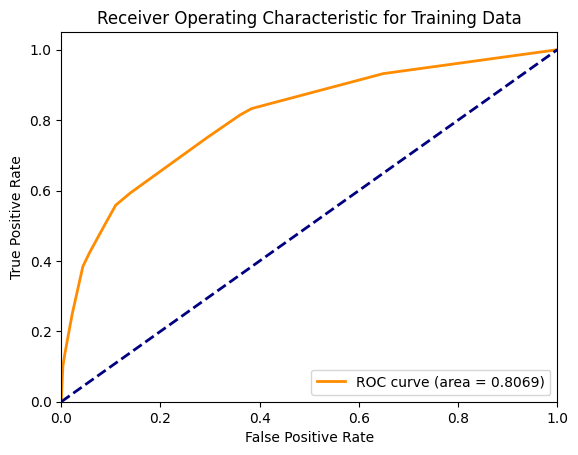

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
roc_auc = roc_auc_score(y_train, y_prob_train)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

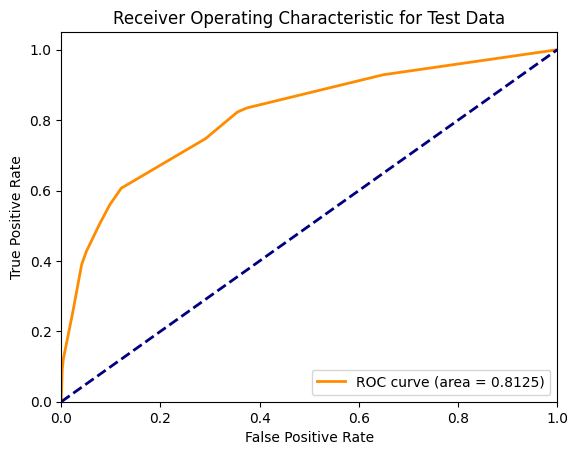

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


Print feature importance for the tree

    importance             feature
1     0.529572              DemAge
0     0.355598             DemAffl
4     0.114830         DemGender_F
2     0.000000           PromSpend
3     0.000000            PromTime
5     0.000000         DemGender_M
6     0.000000         DemGender_U
7     0.000000     DemReg_Midlands
8     0.000000        DemReg_North
9     0.000000     DemReg_Scottish
10    0.000000   DemReg_South East
11    0.000000   DemReg_South West
12    0.000000      PromClass_Gold
13    0.000000  PromClass_Platinum
14    0.000000    PromClass_Silver
15    0.000000       PromClass_Tin


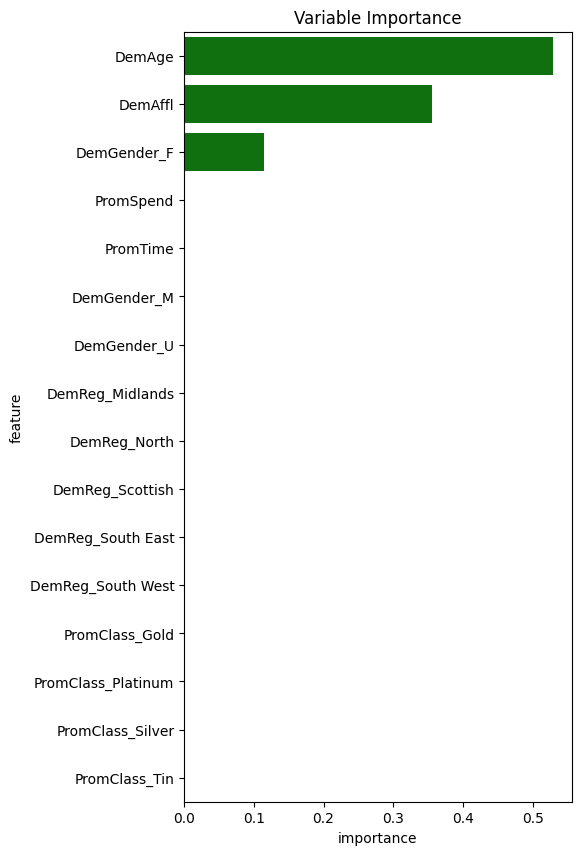

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="green")

plt.show()

Tune Parameters of the Classification Tree

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=100)


Score New organics csv

Load new customer data into a data frame

In [ ]:
# load the data into a pandas dataframe

data_path = '/content/New_organics.csv'
dfnew = pd.read_csv(data_path)

# preview data
dfnew.info()
dfnew.head
print(dfnew)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
      ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender      DemReg  \
0      1        6      46          27               D         F  South East   
1      2       10      39          12               B         M    Midlands 

Preprocess the new data so that it matches the structure of the data used to train the model

In [ ]:
#drop unnecessary cols
dfnew.drop(['ID', 'DemCluster','DemClusterGroup','DemTVReg'], axis=1, inplace=True)
# convert plan variables to numerical
dfnew = X = pd.get_dummies(dfnew, columns=['DemGender', 'DemReg', 'PromClass'], drop_first=False)

dfnew.head()


,DemAffl,DemAge,PromSpend,PromTime,DemGender_F,DemGender_M,DemGender_U,DemReg_Midlands,DemReg_North,DemReg_Scottish,DemReg_South East,DemReg_South West,PromClass_Gold,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,6,46,0.01,8,1,0,0,0,0,0,1,0,0,0,0,1
1,10,39,0.01,5,0,1,0,1,0,0,0,0,0,0,0,1
2,7,75,4000.00,7,0,1,0,1,0,0,0,0,0,0,1,0
3,7,72,1250.00,23,1,0,0,1,0,0,0,0,0,0,1,0
4,7,43,0.01,5,0,1,0,0,1,0,0,0,0,0,0,1


"Score" the new data


In [ ]:
# make predictions on the training and test data
Scored_class = dt.predict(dfnew)
Scored_probs = dt.predict_proba(dfnew)

dfnew['pred_buy'] = Scored_class
dfnew['prod_prob_buy']=Scored_probs[:,1]

print(dfnew)

     DemAffl  DemAge  PromSpend  PromTime  DemGender_F  DemGender_M  \
0          6      46       0.01         8            1            0   
1         10      39       0.01         5            0            1   
2          7      75    4000.00         7            0            1   
3          7      72    1250.00        23            1            0   
4          7      43       0.01         5            0            1   
..       ...     ...        ...       ...          ...          ...   
145        3      59   12000.00         4            1            0   
146        8      69   14400.00         8            0            1   
147        7      27       0.01         4            1            0   
148       10      63    3000.00         7            0            1   
149       18      41       0.01         5            1            0   

     DemGender_U  DemReg_Midlands  DemReg_North  DemReg_Scottish  \
0              0                0             0                0   
1          

Export the scored data to Excel


In [ ]:
scored_file = 'newscoreddata.xlsx'
dfnew.to_excel(scored_file)

#Setting up logistic regression

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel




Create methods to deal with logstic reg. models

In [ ]:
# function to calculate perofrmance from sklearn logistic regression models
def performance_rpt(model, X_test, y_test):
    # Calculate performance metrics using the provided model
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    y_true = y_test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    aucroc = roc_auc_score(y_test, y_proba)

    # Print the performance metrics
    #print(" -- Model Performance on Test Set --")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"AUC-ROC  : {aucroc:.4f}\n")

    return accuracy, precision, recall, aucroc



In [ ]:
# function for model coefficents from sklearn logistic regression
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients



In [ ]:
# plot variable importance for sklearn logistic regression
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

In [ ]:
# load the data into a pandas dataframe

data_path = '/content/organics.csv'
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)

# total count of NaN values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
             ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender  \
0           140     10.0    76.0        16.0               C     

Clean data

In [ ]:
df = df.dropna()

In [ ]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
# split the data into training and testing sets
X = df.drop(['TargetBuy'], axis=1)

X = df[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]
X = pd.get_dummies(X, columns=['DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass'], drop_first=False)



y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   DemCluster             11485 non-null  float64
 3   PromSpend              11485 non-null  float64
 4   PromTime               11485 non-null  float64
 5   DemClusterGroup_A      11485 non-null  uint8  
 6   DemClusterGroup_B      11485 non-null  uint8  
 7   DemClusterGroup_C      11485 non-null  uint8  
 8   DemClusterGroup_D      11485 non-null  uint8  
 9   DemClusterGroup_E      11485 non-null  uint8  
 10  DemClusterGroup_F      11485 non-null  uint8  
 11  DemClusterGroup_U      11485 non-null  uint8  
 12  DemGender_F            11485 non-null  uint8  
 13  DemGender_M            11485 non-null  uint8  
 14  DemGender_U            11485 non-null  uint8  
 15

In [ ]:
#Fit full logistic regression model with statsmodels to examine the significance of the terms
X1 = X_train
X1 = sm.add_constant(X1)
y=y_train

logit_full = sm.Logit(y, X1).fit()

#Print summary
print(logit_full.summary())


Optimization terminated successfully.
         Current function value: 0.448975
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                11485
Model:                          Logit   Df Residuals:                    11457
Method:                           MLE   Df Model:                           27
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.2220
Time:                        04:11:58   Log-Likelihood:                -5156.5
converged:                       True   LL-Null:                       -6628.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7070        nan        nan        nan         nan         

In [ ]:
# Generate predicted values for training set
pprob = logit_full.predict(X1)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   DemCluster             11485 non-null  float64
 3   PromSpend              11485 non-null  float64
 4   PromTime               11485 non-null  float64
 5   DemClusterGroup_A      11485 non-null  uint8  
 6   DemClusterGroup_B      11485 non-null  uint8  
 7   DemClusterGroup_C      11485 non-null  uint8  
 8   DemClusterGroup_D      11485 non-null  uint8  
 9   DemClusterGroup_E      11485 non-null  uint8  
 10  DemClusterGroup_F      11485 non-null  uint8  
 11  DemClusterGroup_U      11485 non-null  uint8  
 12  DemGender_F            11485 non-null  uint8  
 13  DemGender_M            11485 non-null  uint8  
 14  DemGender_U            11485 non-null  uint8  
 15

#Model 2: FULL MODEL

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)
auc_train = roc_auc_score(y_train,pprob)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)   : {:.4f}".format(rec_train))
print("AUC (Train)      : {:.4f}".format(auc_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)
auc_test = roc_auc_score(y_test, pprob_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)   : {:.4f}".format(rec_test))
print("AUC (Test)      : {:.4f}".format(auc_train))
print("")


Accuracy (Train) : 0.7997
Precision (Train): 0.7046
Recall (Train)   : 0.4147
AUC (Train)      : 0.8016

Accuracy (Test) : 0.8036
Precision (Test): 0.7126
Recall (Test)   : 0.4235
AUC (Test)      : 0.8016



In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[7927 1774]
 [ 527 1257]]
[[3408  746]
 [ 221  548]]


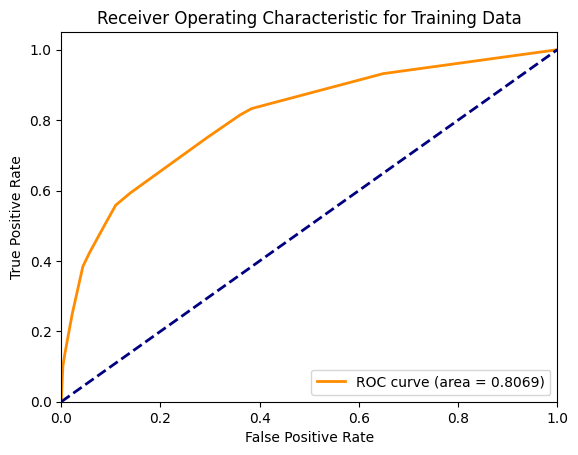

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
roc_auc = roc_auc_score(y_train, y_prob_train)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


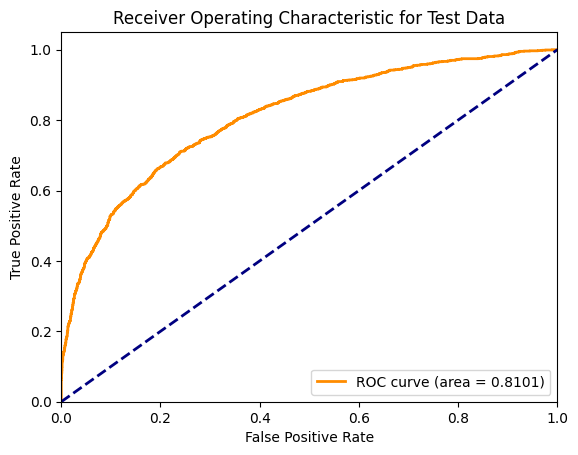

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, pprob_test)
roc_auc = roc_auc_score(y_test, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


#Step-wise selection

In [ ]:
# split the data into training and testing sets
X2 = df.drop(['TargetBuy'], axis=1)

X2 = df[['DemAffl', 'DemAge', 'DemGender',
       'DemReg', 'PromClass', 'PromSpend', 'PromTime']]
X2 = pd.get_dummies(X2, columns=['DemGender','DemReg', 'PromClass' ], drop_first=False)

y2 = df['TargetBuy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             11485 non-null  float64
 1   DemAge              11485 non-null  float64
 2   PromSpend           11485 non-null  float64
 3   PromTime            11485 non-null  float64
 4   DemGender_F         11485 non-null  uint8  
 5   DemGender_M         11485 non-null  uint8  
 6   DemGender_U         11485 non-null  uint8  
 7   DemReg_Midlands     11485 non-null  uint8  
 8   DemReg_North        11485 non-null  uint8  
 9   DemReg_Scottish     11485 non-null  uint8  
 10  DemReg_South East   11485 non-null  uint8  
 11  DemReg_South West   11485 non-null  uint8  
 12  PromClass_Gold      11485 non-null  uint8  
 13  PromClass_Platinum  11485 non-null  uint8  
 14  PromClass_Silver    11485 non-null  uint8  
 15  PromClass_Tin       11485 non-null  uint8  
dtype

StepWise selection


In [ ]:
# split the data into training and testing sets
X2 = df.drop(['TargetBuy'], axis=1)

X2 = df[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]
X2 = pd.get_dummies(X2, columns=['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass'], drop_first=False)

y2 = df['TargetBuy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   DemCluster             11485 non-null  float64
 3   PromSpend              11485 non-null  float64
 4   PromTime               11485 non-null  float64
 5   DemClusterGroup_A      11485 non-null  uint8  
 6   DemClusterGroup_B      11485 non-null  uint8  
 7   DemClusterGroup_C      11485 non-null  uint8  
 8   DemClusterGroup_D      11485 non-null  uint8  
 9   DemClusterGroup_E      11485 non-null  uint8  
 10  DemClusterGroup_F      11485 non-null  uint8  
 11  DemClusterGroup_U      11485 non-null  uint8  
 12  DemGender_F            11485 non-null  uint8  
 13  DemGender_M            11485 non-null  uint8  
 14  DemGender_U            11485 non-null  uint8  
 15

In [ ]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())


Optimization terminated successfully.
         Current function value: 0.448975
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                11485
Model:                          Logit   Df Residuals:                    11457
Method:                           MLE   Df Model:                           27
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.2220
Time:                        04:12:00   Log-Likelihood:                -5156.5
converged:                       True   LL-Null:                       -6628.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7070        nan        nan        nan         nan         

In [ ]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()

# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   DemCluster             11485 non-null  float64
 3   PromSpend              11485 non-null  float64
 4   PromTime               11485 non-null  float64
 5   DemClusterGroup_A      11485 non-null  uint8  
 6   DemClusterGroup_B      11485 non-null  uint8  
 7   DemClusterGroup_C      11485 non-null  uint8  
 8   DemClusterGroup_D      11485 non-null  uint8  
 9   DemClusterGroup_E      11485 non-null  uint8  
 10  DemClusterGroup_F      11485 non-null  uint8  
 11  DemClusterGroup_U      11485 non-null  uint8  
 12  DemGender_F            11485 non-null  uint8  
 13  DemGender_M            11485 non-null  uint8  
 14  DemGender_U            11485 non-null  uint8  
 15

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[7927 1774]
 [ 527 1257]]
[[3408  746]
 [ 221  548]]


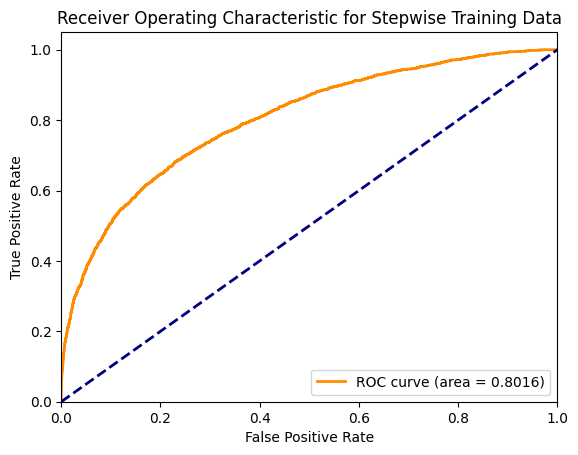

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train, pprob2)
roc_auc = roc_auc_score(y2_train, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

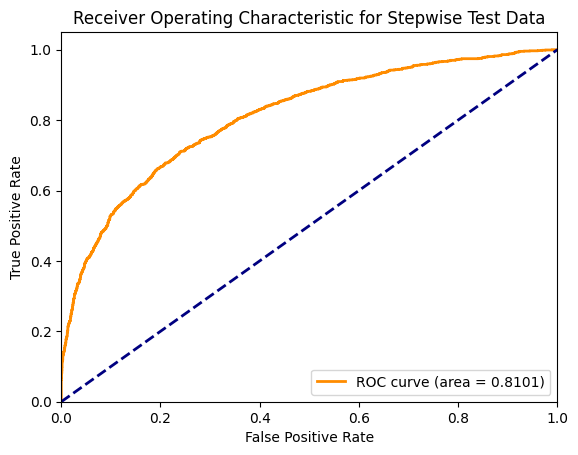

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test, pprob2_test)
roc_auc = roc_auc_score(y2_test, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()


Results:

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.7997
Precision (Train): 0.7046
Recall (Train)  : 0.4147

Accuracy (Test) : 0.8036
Precision (Test): 0.7126
Recall (Test)  : 0.4235



#L1 w/ C= .1 and 1

In [ ]:
# split the data into training and testing sets
X3 = df.drop(['TargetBuy'], axis=1)

X3 = df[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']]
X3 = pd.get_dummies(X3, columns=['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass'], drop_first=False)

y3 = df['TargetBuy']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   DemCluster             11485 non-null  float64
 3   PromSpend              11485 non-null  float64
 4   PromTime               11485 non-null  float64
 5   DemClusterGroup_A      11485 non-null  uint8  
 6   DemClusterGroup_B      11485 non-null  uint8  
 7   DemClusterGroup_C      11485 non-null  uint8  
 8   DemClusterGroup_D      11485 non-null  uint8  
 9   DemClusterGroup_E      11485 non-null  uint8  
 10  DemClusterGroup_F      11485 non-null  uint8  
 11  DemClusterGroup_U      11485 non-null  uint8  
 12  DemGender_F            11485 non-null  uint8  
 13  DemGender_M            11485 non-null  uint8  
 14  DemGender_U            11485 non-null  uint8  
 15

In [ ]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 1

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=.001)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C =.01)

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.9, C=1, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)




LogisticRegression(C=1, l1_ratio=0.9, penalty='elasticnet', solver='saga')

#Function for model coefs

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                  feature  coefficient  abs_coefficient
14            DemGender_U      -1.7207           1.7207
13            DemGender_M      -0.7006           0.7006
0                 DemAffl       0.2457           0.2457
12            DemGender_F       0.2205           0.2205
31     DemTVReg_Yorkshire      -0.1387           0.1387
27        DemTVReg_N West      -0.1358           0.1358
25        DemTVReg_N East       0.1178           0.1178
28    DemTVReg_S & S East      -0.0843           0.0843
35          PromClass_Tin      -0.0728           0.0728
1                  DemAge      -0.0523           0.0523
6       DemClusterGroup_B      -0.0054           0.0054
8       DemClusterGroup_D      -0.0035           0.0035
4                PromTime       0.0019           0.0019
16           DemReg_North      -0.0016           0.0016
2              DemCluster      -0.0004           0.0004
9       DemClusterGroup_E       0.0000           0.0000
5       DemClusterGroup_A       0.0000          

#Modeling

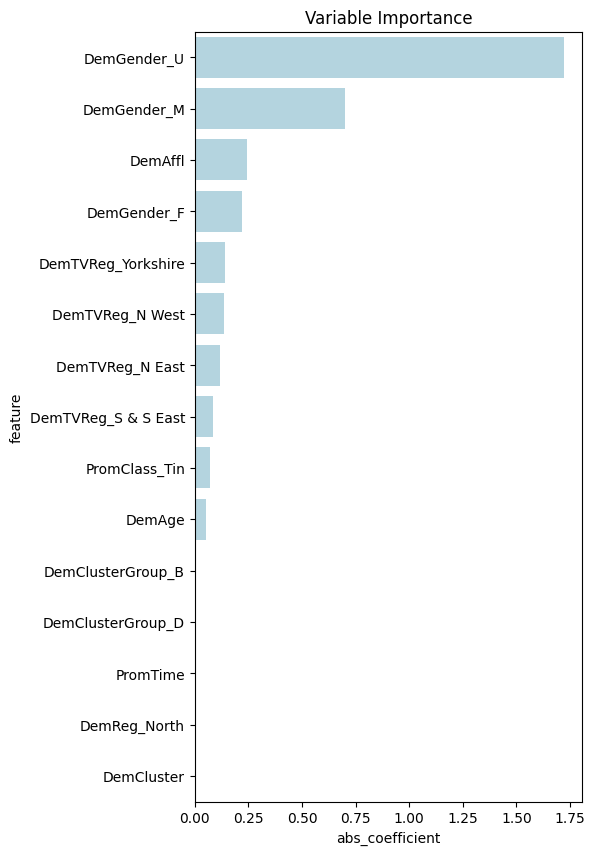

-- rejected --
 DemClusterGroup_E
 DemClusterGroup_A
 PromClass_Silver
 PromClass_Platinum
 PromClass_Gold
 DemTVReg_Wales & West
 DemTVReg_S West
 PromSpend
 DemTVReg_N Scot
 DemTVReg_East
 DemTVReg_Midlands
 DemTVReg_London
 DemClusterGroup_F
 DemTVReg_C Scotland
 DemTVReg_Border
 DemReg_South West
 DemReg_Scottish
 DemReg_Midlands
 DemClusterGroup_C
 DemClusterGroup_U
 DemReg_South East


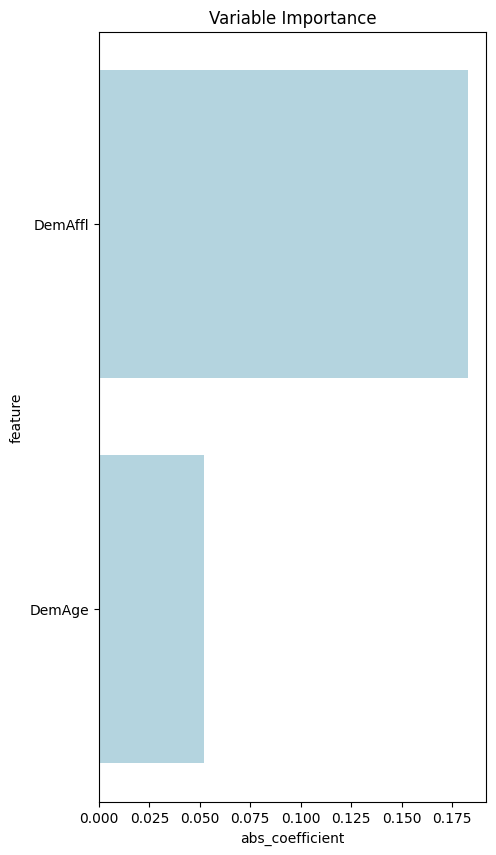

-- rejected --
 DemTVReg_Border
 DemTVReg_C Scotland
 DemTVReg_East
 DemTVReg_London
 DemTVReg_Midlands
 DemTVReg_N East
 DemTVReg_N Scot
 DemTVReg_N West
 DemTVReg_S & S East
 DemTVReg_S West
 DemTVReg_Wales & West
 DemTVReg_Yorkshire
 PromClass_Gold
 PromClass_Platinum
 PromClass_Silver
 DemReg_South West
 DemReg_South East
 DemReg_Scottish
 DemClusterGroup_D
 DemCluster
 PromSpend
 PromTime
 DemClusterGroup_A
 DemClusterGroup_B
 DemClusterGroup_C
 DemClusterGroup_E
 DemReg_North
 DemClusterGroup_F
 DemClusterGroup_U
 DemGender_F
 DemGender_M
 DemGender_U
 DemReg_Midlands
 PromClass_Tin


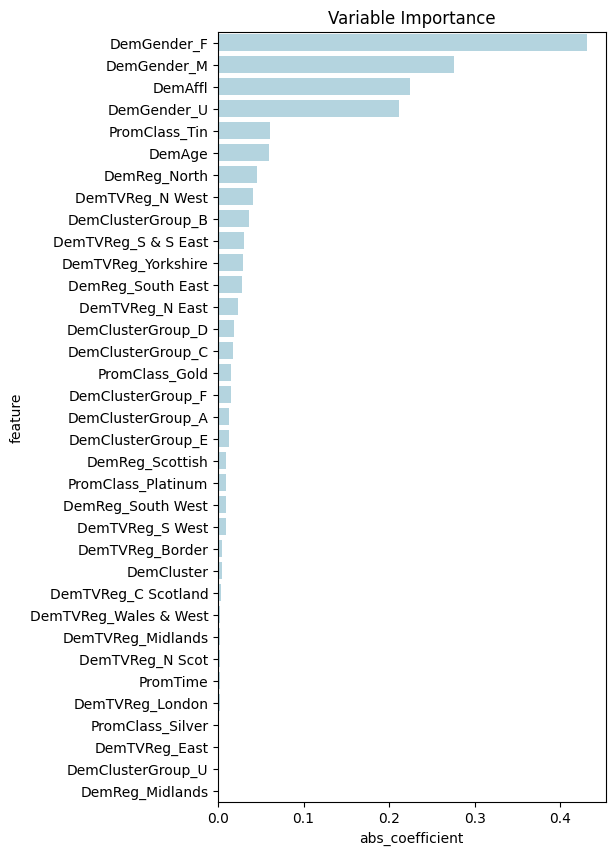

-- rejected --
 PromSpend


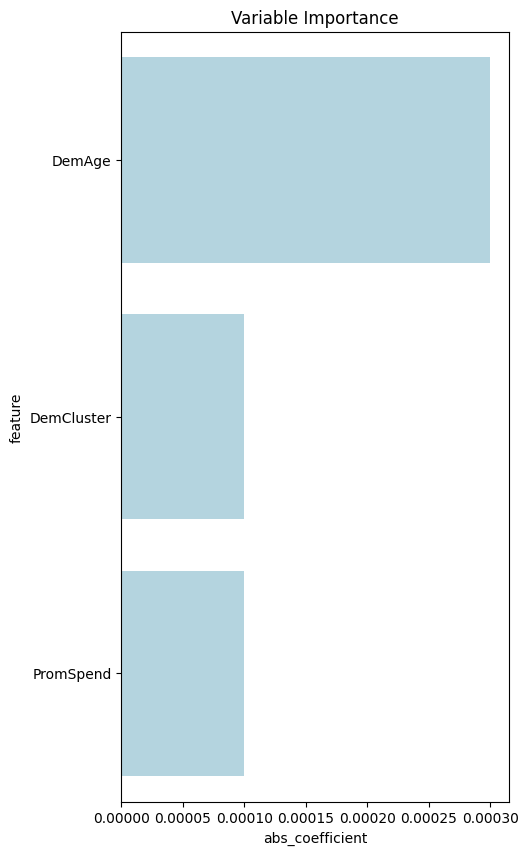

-- rejected --
 DemTVReg_N West
 DemTVReg_C Scotland
 DemTVReg_East
 DemTVReg_London
 DemTVReg_Midlands
 DemTVReg_N East
 DemTVReg_N Scot
 DemAffl
 DemTVReg_S & S East
 DemTVReg_Border
 DemTVReg_Wales & West
 DemTVReg_Yorkshire
 PromClass_Gold
 PromClass_Platinum
 PromClass_Silver
 DemTVReg_S West
 DemReg_South East
 DemReg_South West
 DemReg_Scottish
 DemReg_North
 DemReg_Midlands
 DemGender_U
 DemGender_M
 DemGender_F
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 DemClusterGroup_C
 DemClusterGroup_B
 DemClusterGroup_A
 PromTime
 PromClass_Tin


In [ ]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

In [ ]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)

y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)



#l1 c=.1

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.7996
Precision: 0.7060
Recall.  : 0.4121
AUC      : 0.8008

 -- test set -- 
Accuracy : 0.8070
Precision: 0.7251
Recall.  : 0.4281
AUC      : 0.8112


#l1 with c = .001

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.7927
Precision: 0.7386
Recall.  : 0.3319
AUC      : 0.7662

 -- test set -- 
Accuracy : 0.7896
Precision: 0.7240
Recall.  : 0.3223
AUC      : 0.7852


#l2

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.8010
Precision: 0.7194
Recall.  : 0.4035
AUC      : 0.7898

 -- test set -- 
Accuracy : 0.8080
Precision: 0.7355
Recall.  : 0.4212
AUC      : 0.8044


#elastic net

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.7361
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6005

 -- test set -- 
Accuracy : 0.7372
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6138


In [ ]:
df_coefficients01

,feature,coefficient,abs_coefficient
0,DemAffl,0.1829,0.1829
1,DemAge,-0.0520,0.0520
20,DemTVReg_Border,0.0000,0.0000
21,DemTVReg_C Scotland,0.0000,0.0000
22,DemTVReg_East,0.0000,0.0000
23,DemTVReg_London,0.0000,0.0000
24,DemTVReg_Midlands,0.0000,0.0000
25,DemTVReg_N East,0.0000,0.0000
26,DemTVReg_N Scot,0.0000,0.0000
27,DemTVReg_N West,0.0000,0.0000


In [ ]:
%%shell
jupyter nbconvert --to html  "/content/drive/MyDrive/Colab Notebooks/Project3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project3.ipynb to html
[NbConvertApp] Writing 2556225 bytes to /content/drive/MyDrive/Colab Notebooks/Project3.html


In [ ]:
dwq'
ed;ávld v,sd,/v
;g'
rl]we,ewwwe8w